In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from ekdist import ekrecord
from ekdist import ekplot

In [3]:
rec = ekrecord.SingleChannelRecord()
infile = "../ekdist/tests/181003S8.SCN"
#infile = "../ekdist/tests/AChsim.scn"
rec.load_SCN_file(infile)
print(rec)

Intervals loaded from SCN file: ../ekdist/tests/181003S8.SCN
Total number of intervals = 10610
Resolution for HJC calculations = 0.0 microseconds
Number of resolved intervals = 10609
Number of time periods = 9459

Number of open periods = 4730
Mean and SD of open periods = 0.595444014 +/- 0.698772782 ms
Range of open periods from 0.008928712 ms to 9.549509865 ms

Number of shut intervals = 4729
Mean and SD of shut periods = 139.874249697 +/- 464.593946934 ms
Range of shut periods from 0.001000000 ms to 5753.057956696 ms


In [4]:
rec.tres = 30e-6
print(rec)

Intervals loaded from SCN file: ../ekdist/tests/181003S8.SCN
Total number of intervals = 10610
Resolution for HJC calculations = 30.0 microseconds
Number of resolved intervals = 9072
Number of time periods = 6995

Number of open periods = 3498
Mean and SD of open periods = 0.810135248 +/- 1.038887086 ms
Range of open periods from 0.030263431 ms to 14.093250909 ms

Number of shut intervals = 3497
Mean and SD of shut periods = 189.147233963 +/- 531.719386578 ms
Range of shut periods from 0.030003665 ms to 5753.057956696 ms


### Amplitudes

Average open amplitude =  -5.314578285583337


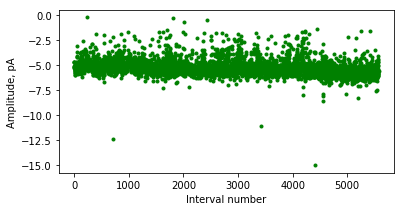

In [5]:
fc = 3000 # 3 kHz
fig = ekplot.stability_amplitudes(rec, window=1)
#plt.savefig('stability_amplitudes.png')

Range of amplitudes: 0.258 - 7.124


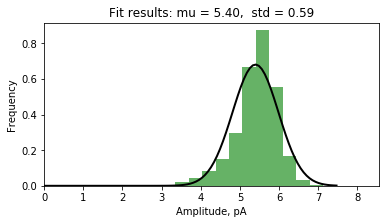

In [6]:
fig = ekplot.histogram_fitted_amplitudes(rec, fc, n=2, gauss=True)
#plt.savefig('histogram_fitted_amplitudes.png')

### Stability plots: open periods, shut periods, Popen

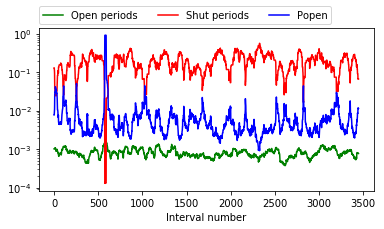

In [7]:
fig = ekplot.stability_intervals(rec, window=50)
#plt.savefig('stability_open_shut_Popen.png')

### Open periods

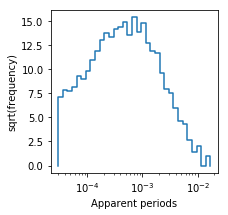

In [8]:
fig = ekplot.histogram_xlog_ysqrt_data(rec.opint, rec.tres)

### Shut periods

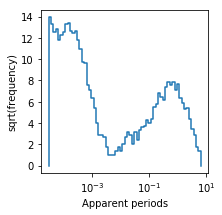

In [9]:
fig = ekplot.histogram_xlog_ysqrt_data(rec.shint, rec.tres)